In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#didn't encode
#didn't scale

df=pd.read_csv('hotel_bookings.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
((df.isnull().sum())/ 119390)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

In [8]:
df.drop(['company'], axis=1,inplace=True)
#more than 95% values are null values

In [9]:
df.fillna(value=df.median(axis=1) )

C:\Users\sandr\AppData\Local\Temp\ipykernel_12868\3269927763.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(value=df.median(axis=1) )


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [10]:
df['days_in_waiting_list'].value_counts(normalize=True)

0      0.969026
39     0.001901
58     0.001374
44     0.001181
31     0.001064
         ...   
116    0.000008
109    0.000008
37     0.000008
89     0.000008
36     0.000008
Name: days_in_waiting_list, Length: 128, dtype: float64

In [11]:
df.drop(['days_in_waiting_list'], axis=1,inplace=True)
#majority values are 0

In [12]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,394.0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,9.0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,9.0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,89.0,Transient,104.40,0,0,Check-Out,2017-09-07


# setup pycaret
exp_lead_scoring = setup(data=df, target = 'is_canceled',
                   fold_shuffle=True,
                   session_id = 42,
                   normalize = True,
                   transformation = True,
                   remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                   verbose=True)

In [13]:
df.shape

(119390, 30)

In [14]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


C:\Users\sandr\AppData\Local\Temp\ipykernel_12868\3615994163.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

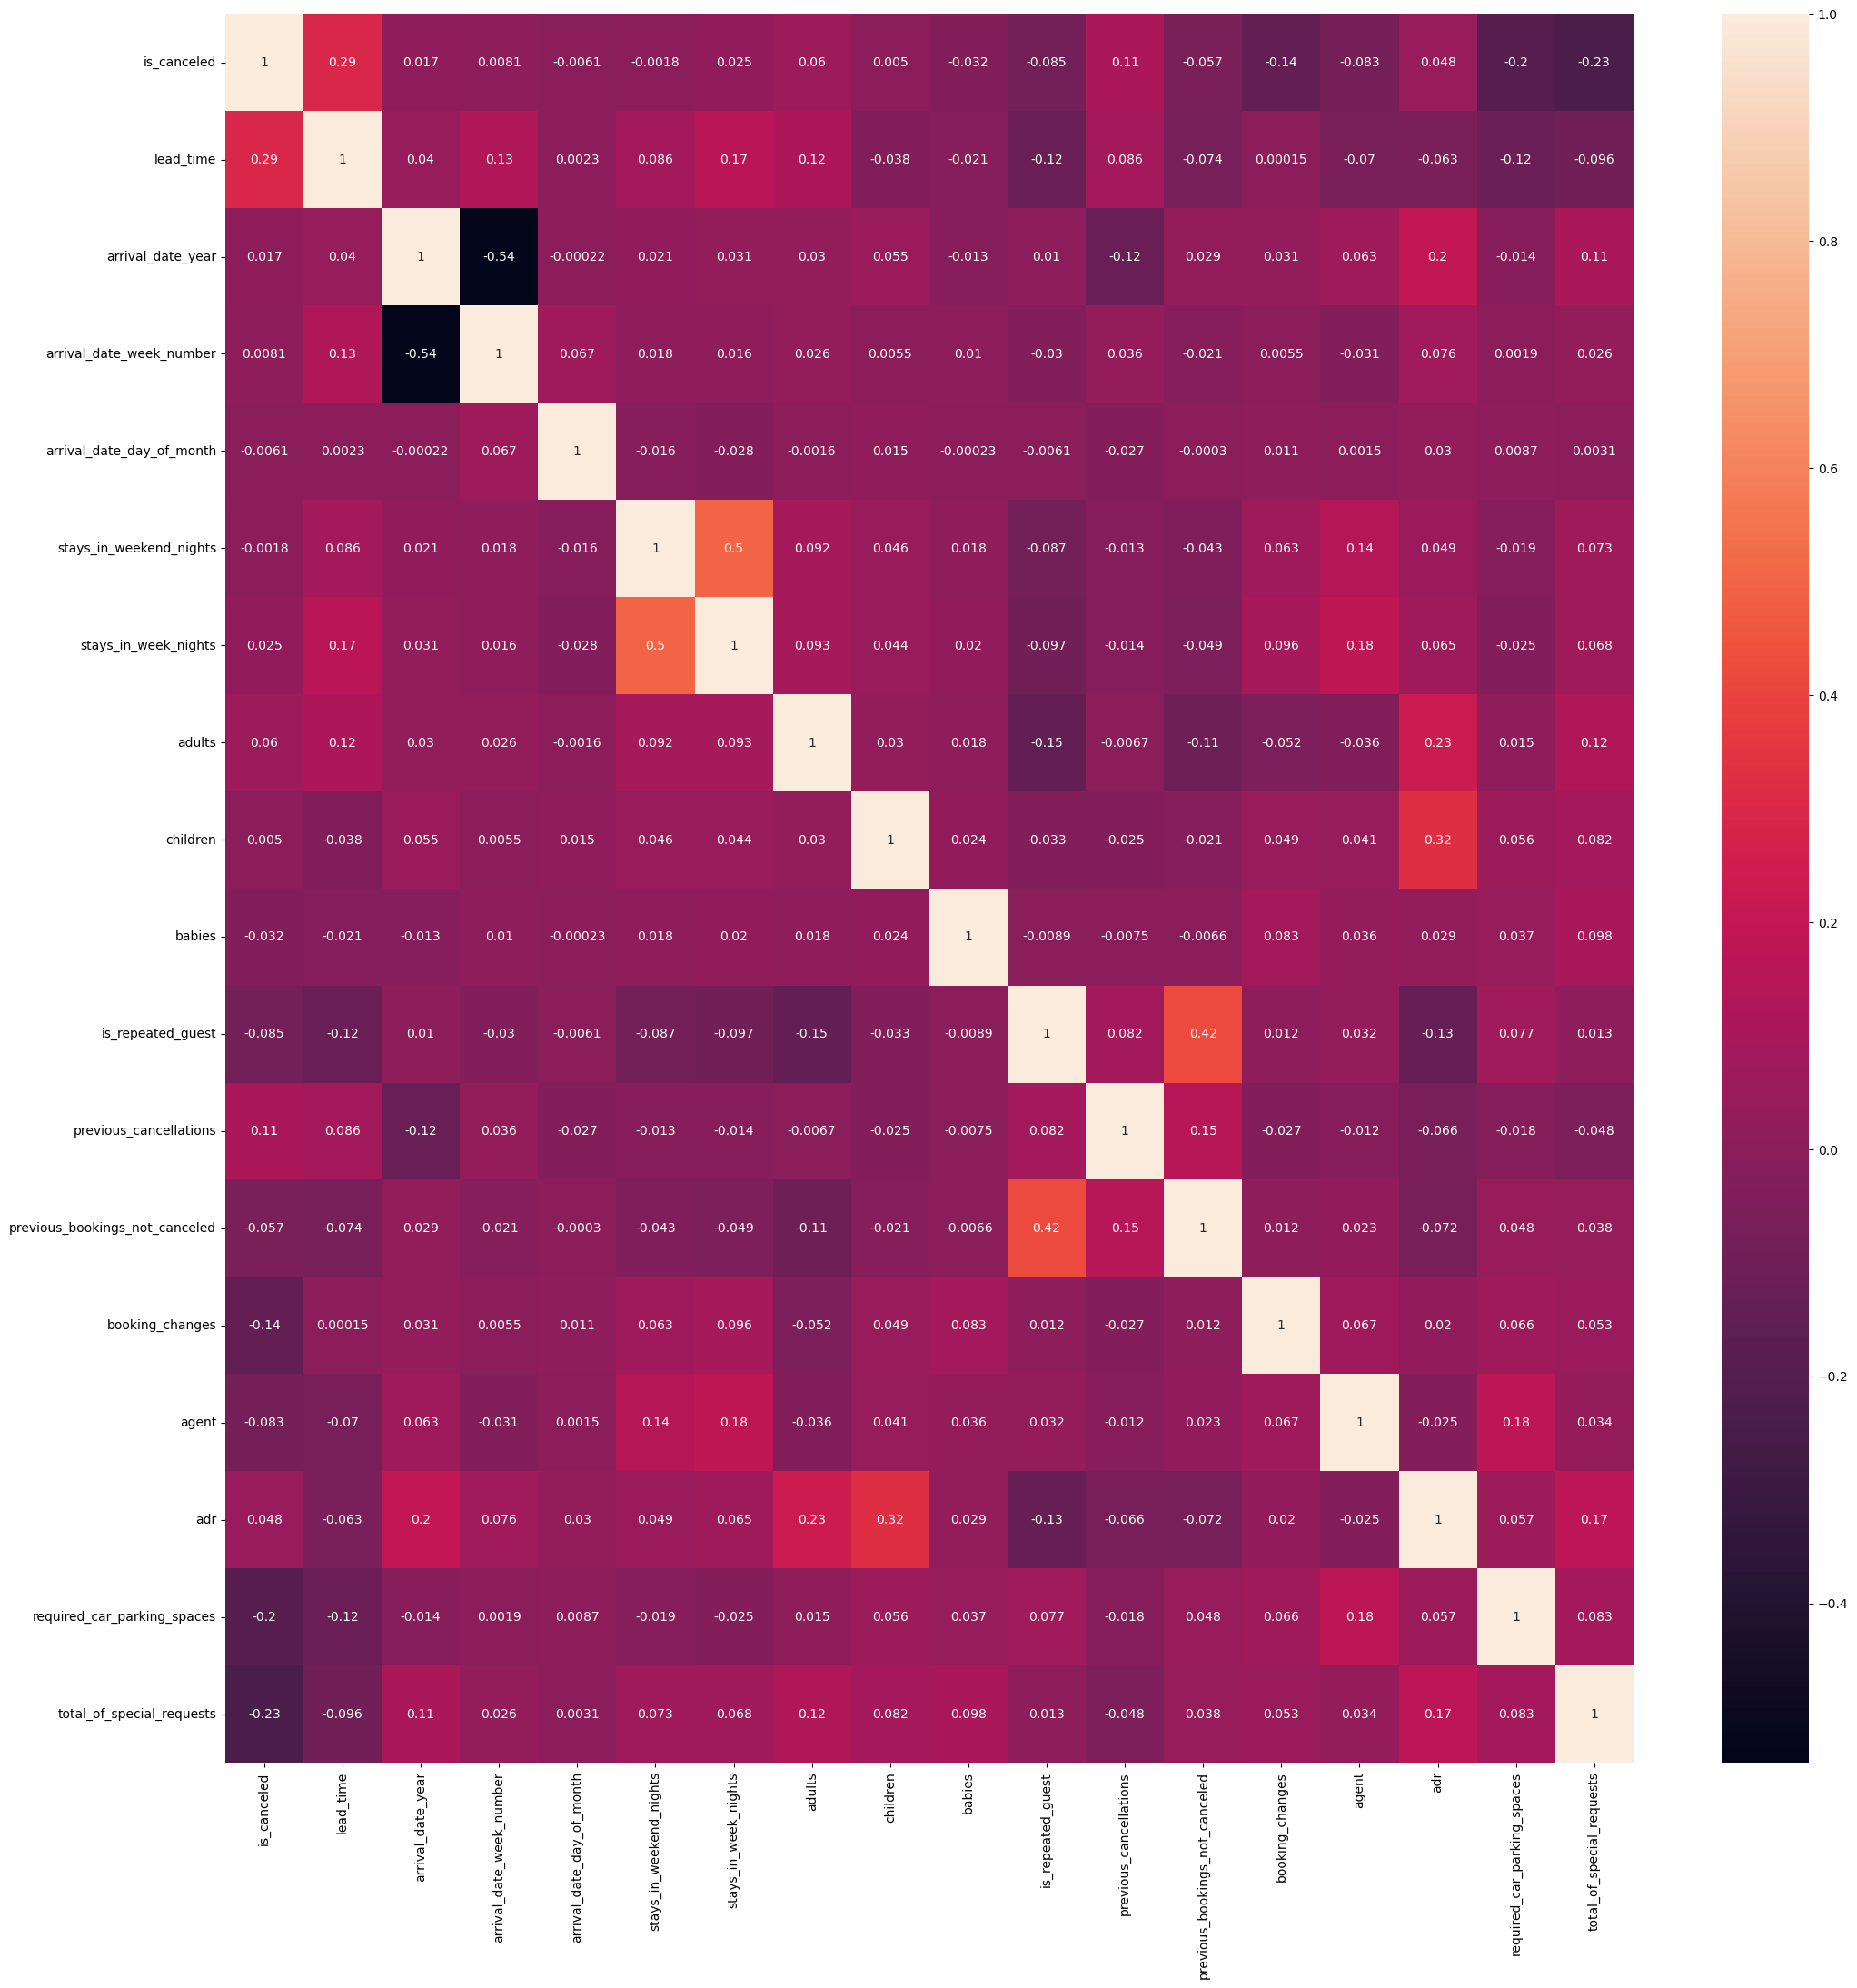

In [15]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

In [16]:
num_df=df.select_dtypes(include=np.number)
num_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,104.40,0,0


In [17]:
obj_df=df.select_dtypes(exclude=np.number)
obj_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


In [18]:
ch3=pd.crosstab(index=df["is_canceled"],columns=obj_df["hotel"])
ch3

hotel,City Hotel,Resort Hotel
is_canceled,,
0,46228,28938
1,33102,11122


In [19]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,5400.000000,8.000000,5.000000


In [20]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [21]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
customer_type                        4
adr                      

In [22]:
median = df.median()
df.fillna(median, inplace=True)

C:\Users\sandr\AppData\Local\Temp\ipykernel_12868\331849085.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = df.median()


In [23]:
continent_mapping = {
    'PRT': 'Europe',
    'GBR': 'Europe',
    'USA': 'North America',
    'ESP': 'Europe',
    'IRL': 'Europe',
    'FRA': 'Europe',
    'ROU': 'Europe',
    'NOR': 'Europe',
    'OMN': 'Asia',
    'ARG': 'South America',
    'POL': 'Europe',
    'DEU': 'Europe',
    'BEL': 'Europe',
    'CHE': 'Europe',
    'CN': 'Asia',
    'GRC': 'Europe',
    'ITA': 'Europe',
    'NLD': 'Europe',
    'DNK': 'Europe',
    'RUS': 'Asia',
    'SWE': 'Europe',
    'AUS': 'Australia',
    'EST': 'Europe',
    'CZE': 'Europe',
    'BRA': 'South America',
    'FIN': 'Europe',
    'MOZ': 'Africa',
    'BWA': 'Africa',
    'LUX': 'Europe',
    'SVN': 'Europe',
    'ALB': 'Europe',
    'IND': 'Asia',
    'CHN': 'Asia',
    'MEX': 'North America',
    'MAR': 'Africa',
    'UKR': 'Europe',
    'SMR': 'Europe',
    'LVA': 'Europe',
    'PRI': 'North America',
    'SRB': 'Europe',
    'CHL': 'South America',
    'AUT': 'Europe',
    'BLR': 'Europe',
    'LTU': 'Europe',
    'TUR': 'Asia',
    'ZAF': 'Africa',
    'AGO': 'Africa',
    'ISR': 'Asia',
    'CYM': 'North America',
    'ZMB': 'Africa',
    'CPV': 'Africa',
    'ZWE': 'Africa',
    'DZA': 'Africa',
    'KOR': 'Asia',
    'CRI': 'North America',
    'HUN': 'Europe',
    'ARE': 'Asia',
    'TUN': 'Africa',
    'JAM': 'North America',
    'HRV': 'Europe',
    'HKG': 'Asia',
    'IRN': 'Asia',
    'GEO': 'Asia',
    'AND': 'Europe',
    'GIB': 'Europe',
    'URY': 'South America',
    'JEY': 'Europe',
    'CAF': 'Africa',
    'CYP': 'Europe',
    'COL': 'South America',
    'GGY': 'Europe',
    'KWT': 'Asia',
    'NGA': 'Africa',
    'MDV': 'Asia',
    'VEN': 'South America',
    'SVK': 'Europe',
    'FJI': 'Australia',
    'KAZ': 'Asia',
    'PAK': 'Asia',
    'IDN': 'Asia',
    'LBN': 'Asia',
    'PHL': 'Asia',
    'SEN': 'Africa',
    'SYC': 'Africa',
    'AZE': 'Asia',
    'BHR': 'Asia',
    'NZL': 'Australia',
    'THA': 'Asia',
    'DOM': 'North America',
    'MKD': 'Europe',
    'MYS': 'Asia',
    'ARM': 'Asia',
    'JPN': 'Asia',
    'LKA': 'Asia',
    'CUB': 'North America',
    'CMR': 'Africa',
    'BIH': 'Europe',
    'MUS': 'Africa',
    'COM': 'Africa',
    'SUR': 'South America',
    'UGA': 'Africa',
    'BGR': 'Europe',
    'CIV': 'Africa',
    'JOR': 'Asia',
    'SYR': 'Asia',
    'SGP': 'Asia',
    'BDI': 'Africa',
    'SAU': 'Asia',
    'VNM': 'Asia',
    'PLW': 'Australia',
    'QAT': 'Asia',
    'EGY': 'Africa',
    'PER': 'South America',
    'MLT': 'Europe',
    'MWI': 'Africa',
    'ECU': 'South America',
    'MDG': 'Africa',
    'ISL': 'Europe',
    'UZB': 'Asia',
    'NPL': 'Asia',
    'BHS': 'North America',
    'MAC': 'Asia',
    'TGO': 'Africa',
    'TWN': 'Asia',
    'DJI': 'Africa',
    'STP': 'Africa',
    'KNA': 'North America',
    'ETH': 'Africa',
    'IRQ': 'Asia',
    'HND': 'North America',
    'RWA': 'Africa',
    'KHM': 'Asia',
    'MCO': 'Europe',
    'BGD': 'Asia',
    'IMN': 'Europe',
    'TJK': 'Asia',
    'NIC': 'North America',
    'BEN': 'Africa',
    'VGB': 'North America',
    'TZA': 'Africa',
    'GAB': 'Africa',
    'GHA': 'Africa',
    'TMP': 'Asia',
    'GLP': 'North America',
    'KEN': 'Africa',
    'LIE': 'Europe',
    'GNB': 'Africa',
    'MNE': 'Europe',
    'UMI': 'Australia',
    'MYT': 'Africa',
    'FRO': 'Europe',
    'MMR': 'Asia',
    'PAN': 'North America',
    'BFA': 'Africa',
    'LBY': 'Africa',
    'MLI': 'Africa',
    'NAM': 'Africa',
    'BOL': 'South America',
    'PRY': 'South America',
    'BRB': 'North America',
    'ABW': 'North America',
    'AIA': 'North America',
    'SLV': 'North America',
    'DMA': 'North America',
    'PYF': 'Australia',
    'GUY': 'South America',
    'LCA': 'North America',
    'ATA': 'Antarctica',
    'GTM': 'North America',
    'ASM': 'Australia',
    'MRT': 'Africa',
    'NCL': 'Australia',
    'KIR': 'Australia',
    'SDN': 'Africa',
    'ATF': 'Antarctica',
    'SLE': 'Africa',
    'LAO': 'Asia'
}

# Use the map function to apply the mapping using a lambda function
df['continents'] = df['country'].apply(lambda code: continent_mapping.get(code, 'Unknown'))

In [24]:
df.drop(['country'], axis=1, inplace=True)

In [25]:
mode=df['continents'].mode()
df['continents'].fillna(mode, axis=0, inplace=True)

In [26]:
#df[['is_canceled']]=df[['is_canceled']].astype('object')

In [27]:
df['reserved_room_type'] = df['reserved_room_type'].apply(lambda x: x if x in ['P', 'L'] else 'A')

In [28]:
df['assigned_room_type'] = df['assigned_room_type'].apply(lambda x: x if x in ['P', 'L','C','F','I','B','K'] else 'A')

In [29]:
df['arrival_date_month']=df['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [30]:
df[['required_car_parking_spaces']]=df[['required_car_parking_spaces']].astype('object')
df["total_of_special_requests"]=df["total_of_special_requests"].astype("object")
df["required_car_parking_spaces"]=df["required_car_parking_spaces"].astype("object")
#df["days_in_waiting_list"]=df["days_in_waiting_list"].astype("object")
df["booking_changes"]=df["booking_changes"].astype("object")
df["previous_bookings_not_canceled"]=df["previous_bookings_not_canceled"].astype("object")
df[['adults']]=df[['adults']].astype('object')
df[['children']]=df[['children']].astype('object')
df[['babies']]=df[['babies']].astype('object')
df[['previous_cancellations']]=df[['previous_cancellations']].astype('object')
df["is_repeated_guest"]=df["is_repeated_guest"].astype("object")

In [31]:
df['children'].value_counts(normalize=True)

0.0     0.928051
1.0     0.040715
2.0     0.030589
3.0     0.000637
10.0    0.000008
Name: children, dtype: float64

In [33]:
num_df=df.select_dtypes(include=np.number)
obj_df=df.select_dtypes(exclude=np.number)

In [36]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   hotel                           119390 non-null  object
 1   adults                          119390 non-null  object
 2   children                        119390 non-null  object
 3   babies                          119390 non-null  object
 4   meal                            119390 non-null  object
 5   market_segment                  119390 non-null  object
 6   distribution_channel            119390 non-null  object
 7   is_repeated_guest               119390 non-null  object
 8   previous_cancellations          119390 non-null  object
 9   previous_bookings_not_canceled  119390 non-null  object
 10  reserved_room_type              119390 non-null  object
 11  assigned_room_type              119390 non-null  object
 12  booking_changes               

In [41]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   is_canceled                119390 non-null  int64  
 1   lead_time                  119390 non-null  int64  
 2   arrival_date_year          119390 non-null  int64  
 3   arrival_date_month         119390 non-null  int64  
 4   arrival_date_week_number   119390 non-null  int64  
 5   arrival_date_day_of_month  119390 non-null  int64  
 6   stays_in_weekend_nights    119390 non-null  int64  
 7   stays_in_week_nights       119390 non-null  int64  
 8   agent                      119390 non-null  float64
 9   adr                        119390 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 9.1 MB


In [42]:
correlation = num_df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                  1.000000
lead_time                    0.293123
agent                        0.051711
adr                          0.047557
stays_in_week_nights         0.024765
arrival_date_year            0.016660
arrival_date_month           0.011022
arrival_date_week_number     0.008148
arrival_date_day_of_month    0.006130
stays_in_weekend_nights      0.001791
Name: is_canceled, dtype: float64

In [43]:
for i in obj_df.columns:
    print(obj_df[i].value_counts(normalize=True))

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64
2     0.751152
1     0.192872
3     0.051947
0     0.003375
4     0.000519
26    0.000042
27    0.000017
20    0.000017
5     0.000017
40    0.000008
50    0.000008
55    0.000008
6     0.000008
10    0.000008
Name: adults, dtype: float64
0.0     0.928051
1.0     0.040715
2.0     0.030589
3.0     0.000637
10.0    0.000008
Name: children, dtype: float64
0     0.992319
1     0.007538
2     0.000126
10    0.000008
9     0.000008
Name: babies, dtype: float64
BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64
TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.

In [44]:
df.drop(['is_repeated_guest','previous_cancellations','babies','children','previous_bookings_not_canceled','required_car_parking_spaces','required_car_parking_spaces','reservation_status_date','assigned_room_type','reserved_room_type','assigned_room_type','reserved_room_type','meal'],axis=1,inplace=True)

In [45]:
df["total_of_special_requests"]=df["total_of_special_requests"].apply(lambda x: 3 if x in [3,4,5] else x)

In [46]:
df["continents"]=df["continents"].apply(lambda x: "Others" if x in ["Africa","Australia","Unknown","Antarctica"] else x)

In [47]:
df["market_segment"]=df["market_segment"].apply(lambda x: "Others" if x in ["Corporate","Complementary","Aviation","Undefined"] else x)

In [48]:
df["distribution_channel"].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [49]:
df["distribution_channel"]=df["distribution_channel"].apply(lambda x: "Others" if x in ["Corporate","GDS","Undefined"] else x)

In [50]:
df["booking_changes"]=df["booking_changes"].apply(lambda x: "No" if x==0 else "Yes")

In [51]:
df["adults"]=df["adults"].astype("int")


In [52]:
df["adults"]=df["adults"].apply(lambda x: "Others" if x>3 or x==0 else x)

In [53]:
df["adults"]=df["adults"].astype("object")

In [54]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,market_segment,distribution_channel,booking_changes,deposit_type,agent,customer_type,adr,total_of_special_requests,reservation_status,continents
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,Direct,Direct,Yes,No Deposit,14.0,Transient,0.00,0,Check-Out,Europe
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,Direct,Direct,Yes,No Deposit,14.0,Transient,0.00,0,Check-Out,Europe
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,Direct,Direct,No,No Deposit,14.0,Transient,75.00,0,Check-Out,Europe
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,Others,Others,No,No Deposit,304.0,Transient,75.00,0,Check-Out,Europe
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,Online TA,TA/TO,No,No Deposit,240.0,Transient,98.00,1,Check-Out,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,Offline TA/TO,TA/TO,No,No Deposit,394.0,Transient,96.14,0,Check-Out,Europe
119386,City Hotel,0,102,2017,8,35,31,2,5,3,Online TA,TA/TO,No,No Deposit,9.0,Transient,225.43,2,Check-Out,Europe
119387,City Hotel,0,34,2017,8,35,31,2,5,2,Online TA,TA/TO,No,No Deposit,9.0,Transient,157.71,3,Check-Out,Europe
119388,City Hotel,0,109,2017,8,35,31,2,5,2,Online TA,TA/TO,No,No Deposit,89.0,Transient,104.40,0,Check-Out,Europe


In [40]:
####################3

In [41]:
#from pycaret.classification import *

In [42]:
# create a experimentation with pycaret and exclude ['gbc','knn','qda', 'dummy', 'svm', 'ada']
#best_model = compare_models(fold = 5,exclude=['gbc','knn','qda', 'dummy', 'svm', 'ada'])

In [55]:
num_df=df.select_dtypes(include=np.number)
obj_df=df.select_dtypes(exclude=np.number)

In [56]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   is_canceled                119390 non-null  int64  
 1   lead_time                  119390 non-null  int64  
 2   arrival_date_year          119390 non-null  int64  
 3   arrival_date_month         119390 non-null  int64  
 4   arrival_date_week_number   119390 non-null  int64  
 5   arrival_date_day_of_month  119390 non-null  int64  
 6   stays_in_weekend_nights    119390 non-null  int64  
 7   stays_in_week_nights       119390 non-null  int64  
 8   agent                      119390 non-null  float64
 9   adr                        119390 non-null  float64
 10  total_of_special_requests  119390 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 10.0 MB


In [57]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   hotel                 119390 non-null  object
 1   adults                119390 non-null  object
 2   market_segment        119390 non-null  object
 3   distribution_channel  119390 non-null  object
 4   booking_changes       119390 non-null  object
 5   deposit_type          119390 non-null  object
 6   customer_type         119390 non-null  object
 7   reservation_status    119390 non-null  object
 8   continents            119390 non-null  object
dtypes: object(9)
memory usage: 8.2+ MB


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
num_df.drop(['is_canceled'], axis=1,inplace=True)

In [60]:
ss=StandardScaler()
sc_df=pd.DataFrame(ss.fit_transform(num_df),columns=num_df.columns)
sc_df

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,agent,adr,total_of_special_requests
0,2.227051,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-1.310240,-0.592464,-2.015038,-0.728703
1,5.923385,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-1.310240,-0.592464,-2.015038,-0.728703
2,-0.907814,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-0.786207,-0.592464,-0.530935,-0.728703
3,-0.851667,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-0.786207,2.145860,-0.530935,-0.728703
4,-0.842309,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-0.262174,1.541540,-0.075810,0.554576
...,...,...,...,...,...,...,...,...,...,...
119385,-0.758089,1.192195,0.468360,0.575875,1.617366,1.073895,1.309924,2.995684,-0.112616,-0.728703
119386,-0.018822,1.192195,0.468360,0.575875,1.731251,1.073895,1.309924,-0.639676,2.445779,1.837855
119387,-0.655153,1.192195,0.468360,0.575875,1.731251,1.073895,1.309924,-0.639676,1.105733,3.121134
119388,0.046682,1.192195,0.468360,0.575875,1.731251,1.073895,1.309924,0.115724,0.050833,-0.728703


In [61]:
df_en=pd.get_dummies(obj_df,drop_first=True)
df_en

,hotel_Resort Hotel,adults_2,adults_3,adults_Others,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Others,distribution_channel_Others,distribution_channel_TA/TO,...,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,continents_Europe,continents_North America,continents_Others,continents_South America
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,1,0,0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,1,1,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
119386,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
119387,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
119388,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0


In [62]:
sc_df

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,agent,adr,total_of_special_requests
0,2.227051,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-1.310240,-0.592464,-2.015038,-0.728703
1,5.923385,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-1.310240,-0.592464,-2.015038,-0.728703
2,-0.907814,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-0.786207,-0.592464,-0.530935,-0.728703
3,-0.851667,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-0.786207,2.145860,-0.530935,-0.728703
4,-0.842309,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-0.262174,1.541540,-0.075810,0.554576
...,...,...,...,...,...,...,...,...,...,...
119385,-0.758089,1.192195,0.468360,0.575875,1.617366,1.073895,1.309924,2.995684,-0.112616,-0.728703
119386,-0.018822,1.192195,0.468360,0.575875,1.731251,1.073895,1.309924,-0.639676,2.445779,1.837855
119387,-0.655153,1.192195,0.468360,0.575875,1.731251,1.073895,1.309924,-0.639676,1.105733,3.121134
119388,0.046682,1.192195,0.468360,0.575875,1.731251,1.073895,1.309924,0.115724,0.050833,-0.728703


In [63]:
df_en

,hotel_Resort Hotel,adults_2,adults_3,adults_Others,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Others,distribution_channel_Others,distribution_channel_TA/TO,...,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,continents_Europe,continents_North America,continents_Others,continents_South America
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,1,0,0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,1,1,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
119386,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
119387,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
119388,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0


In [66]:
final_df=pd.concat([sc_df,df_en],axis=1)
final_df

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,agent,adr,total_of_special_requests,...,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,continents_Europe,continents_North America,continents_Others,continents_South America
0,2.227051,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-1.310240,-0.592464,-2.015038,-0.728703,...,0,0,1,0,1,0,1,0,0,0
1,5.923385,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-1.310240,-0.592464,-2.015038,-0.728703,...,0,0,1,0,1,0,1,0,0,0
2,-0.907814,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-0.786207,-0.592464,-0.530935,-0.728703,...,0,0,1,0,1,0,1,0,0,0
3,-0.851667,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-0.786207,2.145860,-0.530935,-0.728703,...,0,0,1,0,1,0,1,0,0,0
4,-0.842309,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-0.262174,1.541540,-0.075810,0.554576,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,-0.758089,1.192195,0.468360,0.575875,1.617366,1.073895,1.309924,2.995684,-0.112616,-0.728703,...,0,0,1,0,1,0,1,0,0,0
119386,-0.018822,1.192195,0.468360,0.575875,1.731251,1.073895,1.309924,-0.639676,2.445779,1.837855,...,0,0,1,0,1,0,1,0,0,0
119387,-0.655153,1.192195,0.468360,0.575875,1.731251,1.073895,1.309924,-0.639676,1.105733,3.121134,...,0,0,1,0,1,0,1,0,0,0
119388,0.046682,1.192195,0.468360,0.575875,1.731251,1.073895,1.309924,0.115724,0.050833,-0.728703,...,0,0,1,0,1,0,1,0,0,0


#for numeric univariate
for i in df_num.select_dtypes(include=np.number):
    print(i)
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    df_num[i].plot(kind='kde')
    plt.axvline(df_num[i].mean(),color='r')
    plt.axvline(df_num[i].median(),color='g')
    plt.axvline(df_num[i].mode()[0],color='b')
    plt.title(i+'_KDE')
    plt.subplot(1,2,2)
    plt.title(i+'_Box')
    df_num[[i]].boxplot()
    plt.show()
    print('skew'+i,df_num[i].skew())
    print('kurt'+i,df_num[i].kurt())
    print('mean'+i,df_num[i].mean())
    print('median'+i,df_num[i].median())
    print('mode'+i,df_num[i].mode()[0])
    print('std'+i,df_num[i].std())
    print('var'+i,df_num[i].var())

In [67]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [68]:
X=final_df
y=df['is_canceled']

In [69]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)

In [70]:
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)

LogisticRegression()

In [71]:
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))

Training R2
1.0
Testing R2
1.0


In [72]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score
predicted = lr.predict(Xtest)
print(confusion_matrix(ytest,predicted))
print(classification_report(ytest,predicted))

[[15017     0]
 [    0  8861]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15017
           1       1.00      1.00      1.00      8861

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [73]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier(max_depth=2,min_samples_split=10)
dt.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=2, min_samples_split=10)

In [74]:
dt.score(Xtrain,ytrain)

1.0

In [75]:
dt.score(Xtest,ytest)

1.0

In [77]:
df['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [ ]:
###############################################################################################################################

In [ ]:
###############################################################################################################################

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X=df1.drop('is_canceled_1',axis=1)
y=df1[['is_canceled_1']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", LogisticRegression()),
))
pipe.fit(scaledXtrain,ytrain)
print("Training R2")
print(pipe.score(scaledXtrain,ytrain))
print("Testing R2")
print(pipe.score(scaledXtest,ytest))
scoresdt = cross_val_score(pipe,scaledXtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

In [ ]:
scaledXtrain.shape

In [ ]:
ytest.shape

In [ ]:
df1.info()

In [ ]:
df1.isnull().sum().sort_values

In [ ]:
df1.nunique().sort_values

In [ ]:
df1.describe(include='number')

In [ ]:
predicted = pipe.predict(scaledXtest)
print(confusion_matrix(ytest,predicted))
print(classification_report(ytest,predicted))

In [ ]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
X=df_encoded.drop('default.payment.next.month',axis=1)
y=df_encoded[['default.payment.next.month']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=20)
pipe = Pipeline((
#("pt",PowerTransformer()),
("lr", DecisionTreeRegressor(max_depth=20)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

In [103]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,972,973,974,975,976,977,978,979,980,981
0,2.227051,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-1.310240,0.247897,-0.260659,-0.081579,...,0,0,0,0,0,0,1,0,0,0
1,5.923385,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-1.310240,0.247897,-0.260659,-0.081579,...,0,0,0,0,0,0,1,0,0,0
2,-0.907814,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-0.786207,-1.478447,-0.260659,-0.081579,...,0,0,0,0,0,0,1,0,0,0
3,-0.851667,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-0.786207,-1.478447,-0.260659,-0.081579,...,0,0,0,0,0,0,1,0,0,0
4,-0.842309,-1.634768,0.144799,-0.012141,-1.685297,-0.928890,-0.262174,0.247897,-0.260659,-0.081579,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,-0.758089,1.192195,0.468360,0.575875,1.617366,1.073895,1.309924,0.247897,-0.260659,-0.081579,...,0,0,0,0,0,0,1,0,0,0
119386,-0.018822,1.192195,0.468360,0.575875,1.731251,1.073895,1.309924,1.974242,-0.260659,-0.081579,...,0,0,0,0,0,0,1,0,0,0
119387,-0.655153,1.192195,0.468360,0.575875,1.731251,1.073895,1.309924,0.247897,-0.260659,-0.081579,...,0,0,0,0,0,0,1,0,0,0
119388,0.046682,1.192195,0.468360,0.575875,1.731251,1.073895,1.309924,0.247897,-0.260659,-0.081579,...,0,0,0,0,0,0,1,0,0,0


In [126]:
df_t['target'] = df_t[0]

In [128]:
df_t.drop(columns = 0,inplace =True)

In [130]:
setup(df_t,target = 'target',remove_multicollinearity=True,preprocess=True)

,Description,Value
0,Session id,1080
1,Target,target
2,Target type,Binary
3,Original data shape,"(119390, 983)"
4,Transformed data shape,"(119390, 981)"
5,Transformed train set shape,"(83573, 981)"
6,Transformed test set shape,"(35817, 981)"
7,Numeric features,982
8,Preprocess,True
9,Imputation type,simple


In [132]:
model = compare_models(fold = 3,exclude=['gbc','knn','qda', 'dummy', 'svm', 'ada'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,61.1867
nb,Naive Bayes,1.0000,1.0000,0.9999,1.0000,1.0000,0.9999,0.9999,58.9233
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,57.9533
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,59.2933
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,66.9533
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,73.8967
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,84.7000
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,62.3933
lda,Linear Discriminant Analysis,0.8794,0.9462,0.6922,0.9749,0.8095,0.7249,0.7477,73.2933


Processing:   0%|          | 0/41 [00:00<?, ?it/s]

In [ ]:
1 is_canceled Value indicating if the booking was canceled (1) or not (0)
2 lead_time Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
3 arrival_date_year Year of arrival date
4 arrival_date_month Month of arrival date
5 arrival_date_week_number Week number of year for arrival date
6 arrival_date_day_of_month Day of arrival date
7 stays_in_weekend_nights Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
8 stays_in_week_nights Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
9 adults Number of adults
10 children Number of children
11 babies Number of babies
12 meal Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal
13 country Country of origin. Categories are represented in the ISO 3155–3:2013 format
14 market_segment Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
15 distribution_channel Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
16 is_repeated_guest Value indicating if the booking name was from a repeated guest (1) or not (0)
17 previous_cancellations Number of previous bookings that were cancelled by the customer prior to the current booking
18 previous_bookings_not_canceled Number of previous bookings not cancelled by the customer prior to the current booking
19 reserved_room_type Code of room type reserved. Code is presented instead of designation for anonymity reasons.
20 assigned_room_typeCode for the type of room assigned to the booking.Code is presented instead of designation for anonymity reasons.
21 booking_changes Number of changes made to the booking from the moment the booking was entered on the PMS until the moment of check-in or out
22 deposit_type Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No
23 agent ID of the travel agency that made the booking
24 company ID of the company that made the booking or responsible for paying the booking.
25 days_in_waiting_list Number of days the booking was in the waiting list before it was confirmed to the customer
26 customer_type Type of booking, assuming one of four categories:Transient - Transient-Party - Contract - Group
27 adr Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
28 required_car_parking_spaces Number of car parking spaces required by the customer
29 total_of_special_requestsNumber of special requests made by the customer (e.g. twin bed or high floor)
30 reservation_status Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out
31 reservation_status_date Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to